In [657]:
%matplotlib notebook
%matplotlib inline

In [794]:
# importing necessary libraries for the current preliminary phase of the 'Water Allocation Price Prediction'
# model development project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow import keras

In [795]:
# reading the water market transactions data
raw_data = pd.read_csv('Downloads/LDI project data/ALL_water_share_trading.csv')

In [796]:
# displaying the first rows of the data for an initial analysis of its features
raw_data.head()

,Status,Application Creation Date,Approved / Refused Date,Recorded / Rejected Date,Water Share ID,Water System Source,Reliability,Trading Zone Source,Seller Water Authority,Seller Trading Zone Use,Buyer Water Authority,Buyer Trading Zone Use,Volume Traded (ML),Price Per ML ($)
0,Recorded,12/7/2013,24/07/2013,23/08/2013,WEE****24,Goulburn,High,1A Greater Goulburn,Goulburn-Murray Water,1A Greater Goulburn,Goulburn-Murray Water,1A Greater Goulburn,17.4,1250.00
1,Recorded,6/1/2020,9/1/2020,10/3/2020,WEE****26,Murray,High,7 VIC Murray - Barmah to SA,Lower Murray Water,7 VIC Murray - Barmah to SA,Lower Murray Water,7 VIC Murray - Barmah to SA,0.5,1219.52
2,Recorded,30/04/2009,13/07/2009,11/9/2009,WEE****80,Goulburn,Low,1A Greater Goulburn,Goulburn-Murray Water,1A Greater Goulburn,Goulburn-Murray Water,1A Greater Goulburn,13.4,0.07
3,Recorded,13/04/2018,26/04/2018,1/5/2018,WEE****36,Goulburn,High,1A Greater Goulburn,Goulburn-Murray Water,1A Greater Goulburn,Goulburn-Murray Water,1A Greater Goulburn,1.0,2800.00
4,Recorded,9/9/2022,28/09/2022,13/10/2022,WEE****71,Murray,High,7 VIC Murray - Barmah to SA,Goulburn-Murray Water,7 VIC Murray - Barmah to SA,Goulburn-Murray Water,7 VIC Murray - Barmah to SA,6.3,7700.00


In [797]:
# obtaining information about the raw water market data to see if the data contains any NaN values to be excluded
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47622 entries, 0 to 47621
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Status                     47622 non-null  object 
 1   Application Creation Date  47622 non-null  object 
 2   Approved / Refused Date    47622 non-null  object 
 3   Recorded / Rejected Date   47622 non-null  object 
 4   Water Share ID             47622 non-null  object 
 5   Water System Source        47622 non-null  object 
 6   Reliability                47622 non-null  object 
 7   Trading Zone Source        47622 non-null  object 
 8   Seller Water Authority     47622 non-null  object 
 9   Seller Trading Zone Use    47622 non-null  object 
 10  Buyer Water Authority      47622 non-null  object 
 11  Buyer Trading Zone Use     47622 non-null  object 
 12  Volume Traded (ML)         47622 non-null  float64
 13  Price Per ML ($)           47622 non-null  flo

In [799]:
# obtaining necessary information about the status of each transaction made in the raw data
raw_data['Status'].value_counts()

Recorded    42768
Rejected     2943
Refused      1681
Expired       230
Name: Status, dtype: int64

In [800]:
# excluding all the transactions from the data, except for ones with the 'Recorded' status

raw_data = raw_data.set_index("Status")
raw_data = raw_data.drop('Rejected')
raw_data = raw_data.drop('Refused')
raw_data = raw_data.drop('Expired')

In [801]:
# converting the setting the 'Approved / Refused Data' column to the 'datetime' format 
raw_data["Approved / Refused Date"] = pd.to_datetime(raw_data["Approved / Refused Date"], format = '%d/%m/%Y')

In [803]:
# as can be seen, dates under the 'Approved / Refused Date' column are different from those of
# 'Application Creation Date' and 'Recorded / Rejected Date'
raw_data.head()

,Application Creation Date,Approved / Refused Date,Recorded / Rejected Date,Water Share ID,Water System Source,Reliability,Trading Zone Source,Seller Water Authority,Seller Trading Zone Use,Buyer Water Authority,Buyer Trading Zone Use,Volume Traded (ML),Price Per ML ($)
Status,,,,,,,,,,,,,
Recorded,12/7/2013,2013-07-24,23/08/2013,WEE****24,Goulburn,High,1A Greater Goulburn,Goulburn-Murray Water,1A Greater Goulburn,Goulburn-Murray Water,1A Greater Goulburn,17.4,1250.00
Recorded,6/1/2020,2020-01-09,10/3/2020,WEE****26,Murray,High,7 VIC Murray - Barmah to SA,Lower Murray Water,7 VIC Murray - Barmah to SA,Lower Murray Water,7 VIC Murray - Barmah to SA,0.5,1219.52
Recorded,30/04/2009,2009-07-13,11/9/2009,WEE****80,Goulburn,Low,1A Greater Goulburn,Goulburn-Murray Water,1A Greater Goulburn,Goulburn-Murray Water,1A Greater Goulburn,13.4,0.07
Recorded,13/04/2018,2018-04-26,1/5/2018,WEE****36,Goulburn,High,1A Greater Goulburn,Goulburn-Murray Water,1A Greater Goulburn,Goulburn-Murray Water,1A Greater Goulburn,1.0,2800.00
Recorded,9/9/2022,2022-09-28,13/10/2022,WEE****71,Murray,High,7 VIC Murray - Barmah to SA,Goulburn-Murray Water,7 VIC Murray - Barmah to SA,Goulburn-Murray Water,7 VIC Murray - Barmah to SA,6.3,7700.00


In [804]:
# modifying the current datetime format of the 'Approved / Refused Date' and formatting it separately as years and months
raw_data["Approved Year"] = raw_data["Approved / Refused Date"].dt.year
raw_data["Approved Month"] = raw_data["Approved / Refused Date"].dt.month

In [805]:
# displaying the modified data to clearly see the changes made
raw_data.head()

,Application Creation Date,Approved / Refused Date,Recorded / Rejected Date,Water Share ID,Water System Source,Reliability,Trading Zone Source,Seller Water Authority,Seller Trading Zone Use,Buyer Water Authority,Buyer Trading Zone Use,Volume Traded (ML),Price Per ML ($),Approved Year,Approved Month
Status,,,,,,,,,,,,,,,
Recorded,12/7/2013,2013-07-24,23/08/2013,WEE****24,Goulburn,High,1A Greater Goulburn,Goulburn-Murray Water,1A Greater Goulburn,Goulburn-Murray Water,1A Greater Goulburn,17.4,1250.00,2013,7
Recorded,6/1/2020,2020-01-09,10/3/2020,WEE****26,Murray,High,7 VIC Murray - Barmah to SA,Lower Murray Water,7 VIC Murray - Barmah to SA,Lower Murray Water,7 VIC Murray - Barmah to SA,0.5,1219.52,2020,1
Recorded,30/04/2009,2009-07-13,11/9/2009,WEE****80,Goulburn,Low,1A Greater Goulburn,Goulburn-Murray Water,1A Greater Goulburn,Goulburn-Murray Water,1A Greater Goulburn,13.4,0.07,2009,7
Recorded,13/04/2018,2018-04-26,1/5/2018,WEE****36,Goulburn,High,1A Greater Goulburn,Goulburn-Murray Water,1A Greater Goulburn,Goulburn-Murray Water,1A Greater Goulburn,1.0,2800.00,2018,4
Recorded,9/9/2022,2022-09-28,13/10/2022,WEE****71,Murray,High,7 VIC Murray - Barmah to SA,Goulburn-Murray Water,7 VIC Murray - Barmah to SA,Goulburn-Murray Water,7 VIC Murray - Barmah to SA,6.3,7700.00,2022,9


In [807]:
# creating a list of all the features of the data
data_features = list(raw_data.columns.values)

# creating a list of data features which are desired to be removed from the data for further processing
remove_features = data_features[:-4]

# removing unwanted non-numeric data features from the data
raw_data_processed = raw_data.drop(remove_features, axis = 1)

# displaying the data to examine the made changes
raw_data_processed.head()

,Volume Traded (ML),Price Per ML ($),Approved Year,Approved Month
Status,,,,
Recorded,17.4,1250.00,2013,7
Recorded,0.5,1219.52,2020,1
Recorded,13.4,0.07,2009,7
Recorded,1.0,2800.00,2018,4
Recorded,6.3,7700.00,2022,9


In [811]:
# multiplying traded volume with its corresponding price to then determine volume weighted average price for each month
volume_times_price = raw_data_processed['Volume Traded (ML)'] * raw_data_processed['Price Per ML ($)']

# integrating this feature to the raw data as an additional column
raw_data_processed['Volume Traded * Price Per ML'] = volume_times_price

# displaying the processed data
raw_data_processed.head()

,Volume Traded (ML),Price Per ML ($),Approved Year,Approved Month,Volume Traded * Price Per ML
Status,,,,,
Recorded,17.4,1250.00,2013,7,21750.000
Recorded,0.5,1219.52,2020,1,609.760
Recorded,13.4,0.07,2009,7,0.938
Recorded,1.0,2800.00,2018,4,2800.000
Recorded,6.3,7700.00,2022,9,48510.000


In [812]:
# obtaining necessary information regarding each year present in the data
raw_data_processed['Approved Year'].value_counts()

# creating a list of each representative year in the data
year_range = np.unique(raw_data['Approved Year'].values)

# creating an empty list for the below-mentioned reason
yearly_data = []

# collecting traded volume and allocation price data for each single year in the data
for i in range(len(year_range)):
    yearly_data.append(raw_data_processed[raw_data["Approved Year"].between(year_range[i], year_range[i])])

In [813]:
# displaying the traded volume and allocation price data for the first year in the data
yearly_data[0].head()

,Volume Traded (ML),Price Per ML ($),Approved Year,Approved Month,Volume Traded * Price Per ML
Status,,,,,
Recorded,13.4,0.07,2009,7,0.938
Recorded,1.0,2300.00,2009,10,2300.000
Recorded,5.0,175.00,2009,7,875.000
Recorded,4.0,2000.00,2009,11,8000.000
Recorded,150.0,2400.00,2009,8,360000.000


In [814]:
# displaying the traded volume and allocation price data for the last year in the data
yearly_data[-1].head()

,Volume Traded (ML),Price Per ML ($),Approved Year,Approved Month,Volume Traded * Price Per ML
Status,,,,,
Recorded,99.0,4570.0,2024,3,452430.0
Recorded,229.9,900.0,2024,3,206910.0
Recorded,2.0,7500.0,2024,2,15000.0
Recorded,10.2,3825.0,2024,1,39015.0
Recorded,20.7,0.0,2024,1,0.0


In [826]:
# creating empty lists to collect total monthly traded volume and volume weighted average water price for each month of each year
total_monthly_traded_volume = []
volume_weighted_price = []
years = []
months = []

# the following 'for' loop collects total monthly traded volume and volume weighted average water price for each month of each year
for i in range(len(yearly_data)):
    
    month_range = np.unique(yearly_data[i]['Approved Month'])

    for j in month_range:
    
        data = yearly_data[i][yearly_data[i]['Approved Month'].between(j, j)]

        price = sum(data['Volume Traded * Price Per ML']) / sum(data['Volume Traded (ML)'])

        volume_weighted_price.append(price)
        
        
        volume = sum(data['Volume Traded (ML)'])
        
        total_monthly_traded_volume.append(volume)
        
        years.append(year_range[i])
        months.append(j)

# creating a dictionary from the collected data
dict = {'Approved Year': years,
        'Approved Month': months,
        'Total Traded Volume (ML)': total_monthly_traded_volume, 
        'Volume Weighted Price ($)':volume_weighted_price}

# creating a dataframe from the above-defined dictionary
dataset = pd.DataFrame(dict)

# displaying the newly generated dataset for analysis
dataset.head()

,Approved Year,Approved Month,Total Traded Volume (ML),Volume Weighted Price ($)
0,2009,5,3347.3,1327.063808
1,2009,6,16993.7,971.378826
2,2009,7,69320.6,1912.612921
3,2009,8,30006.6,1620.363191
4,2009,9,24479.2,1809.068704


In [827]:
# creating a new 'Date' feature for the new dataset by combining each year with its associated months
dataset['Date'] = pd.to_datetime(dataset['Approved Year'].astype(str) + dataset['Approved Month'].astype(str), format = '%Y%m')

# removing the previous date information from the new dataset after creating a new date feature
dataset = dataset.drop(['Approved Year'], axis = 1)
dataset = dataset.drop(['Approved Month'], axis = 1)

# setting the date feature of the new dataset as an index
dataset.set_index('Date', inplace = True)

# displaying the new dataset with the new date feature
dataset.head()

,Total Traded Volume (ML),Volume Weighted Price ($)
Date,,
2009-05-01,3347.3,1327.063808
2009-06-01,16993.7,971.378826
2009-07-01,69320.6,1912.612921
2009-08-01,30006.6,1620.363191
2009-09-01,24479.2,1809.068704


In [829]:
# putting lower and upper limits on the calculated volume weighted water prices to increase the reliability
quality_data = dataset[dataset['Volume Weighted Price ($)'].between(0.1, 1575)]

# displaying the data to see the effect of imposed limitations
quality_data.head()

,Total Traded Volume (ML),Volume Weighted Price ($)
Date,,
2009-05-01,3347.3,1327.063808
2009-06-01,16993.7,971.378826
2009-10-01,22342.1,1391.250243
2010-01-01,33958.7,1406.808987
2010-02-01,76864.5,1473.109005


C:\Users\sulta\anaconda3\envs\hello-tf\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


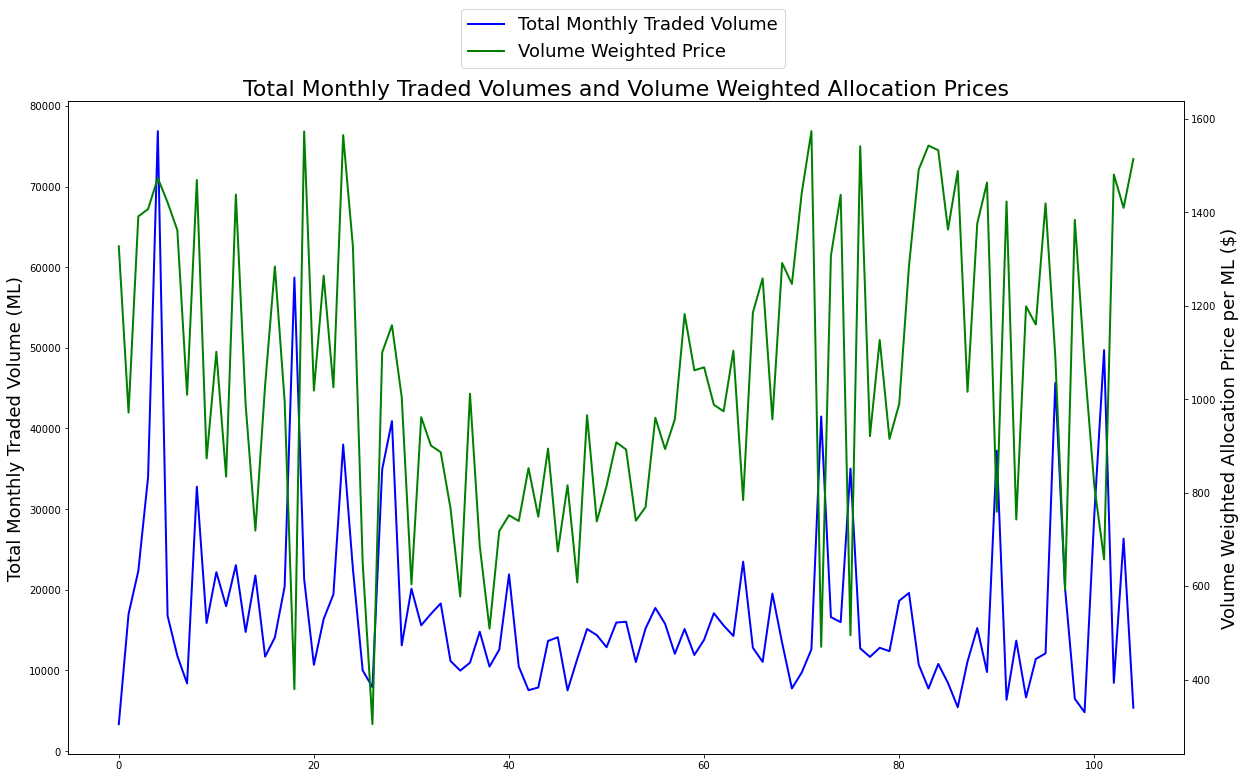

In [831]:
# creating a figure and an axis for a graphical representation of the evolution of the variables of interest
figure, axis_1 = plt.subplots(figsize = (20, 12))

# plotting monthly variation in monthly total traded volumes
axis_1.plot(quality_data['Total Traded Volume (ML)'].values, color = 'blue', linewidth = 2, label = 'Total Monthly Traded Volume')

# copying the x-axis of the previous plot for making another plot
axis_2 = axis_1.twinx()

# plotting monthly variation in volume weighted average water prices
axis_2.plot(quality_data['Volume Weighted Price ($)'].values, color = 'green', linewidth = 2, label = 'Volume Weighted Price')

# naming and labelling the figure
axis_1.set_ylabel('Total Monthly Traded Volume (ML)', fontsize = 18)
axis_2.set_ylabel('Volume Weighted Allocation Price per ML ($)', fontsize = 18)

axis_1.set_title('Total Monthly Traded Volumes and Volume Weighted Allocation Prices', fontsize = 22)

# putting a legend into the figure and displaying the figure
figure.legend(fontsize = 18, loc = 'upper center')

figure.show()

# saving the figure as a png file
plt.savefig("Total Monthly Volume-Weighted Price.png", dpi = 300)

In [833]:
# dividing the new dataset into two sub-sets
X = quality_data['Total Traded Volume (ML)']
y = quality_data['Volume Weighted Price ($)']

# generating training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)

# converting training and testing datasets for regression analysis into arrays
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)

# scaling training and testing datasets for regression analysis
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [834]:
# creating a linear regression model
linear_regr = LinearRegression()

# training a linear regression model using the training dataset
linear_regr.fit(X_train_scaled, y_train)

#evaluating the model performance on the testing dataset
linear_regr.score(X_test_scaled, y_test)

-0.0192582744104417

As is clearly seen from the performance of a **linear regression** model on the test data, the model does not provide satisfactory results at all, as it is significantly closer to or less than to **0**. 
Depending on the generated training and testing datasets, the model performance can also be larger than **0**.

In [835]:
# displaying information about shape of each training and testing dataset
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((84, 1), (21, 1), (84,), (21,))

In [836]:
# creating a deep neural network to attempt to capture non-linear relationship between the variables of interest
model = Sequential()

# creating an input layer and adding two dense hidden layers into the neural network
# employing the 'relu' activation function as a rule of thumb
model.add(Dense(100, activation = 'relu', input_shape = (X_train_scaled.shape[1],)))
model.add(Dense(64, activation = 'relu'))

# creating an output layer for the network
# using the 'linear' activation function for the regression problem under consideration
model.add(Dense(1, activation = 'linear'))

In [837]:
# displaying the model summary
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 100)               200       
_________________________________________________________________
dense_41 (Dense)             (None, 64)                6464      
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 65        
Total params: 6,729
Trainable params: 6,729
Non-trainable params: 0
_________________________________________________________________


In [838]:
# choosing an optimizer, loss function and a performance metric to comppile the model
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), 
              loss = tf.keras.losses.MeanSquaredError(), 
              metrics = tf.keras.metrics.MeanSquaredError())

In [839]:
# number of epochs and batch size to train the model
epochs = 500
batch_size = 1

# training the neural network with two hidden layers and recording the training history for further analysis
model_training = model.fit(X_train_scaled, y_train, epochs = epochs, batch_size = batch_size, verbose = 0)

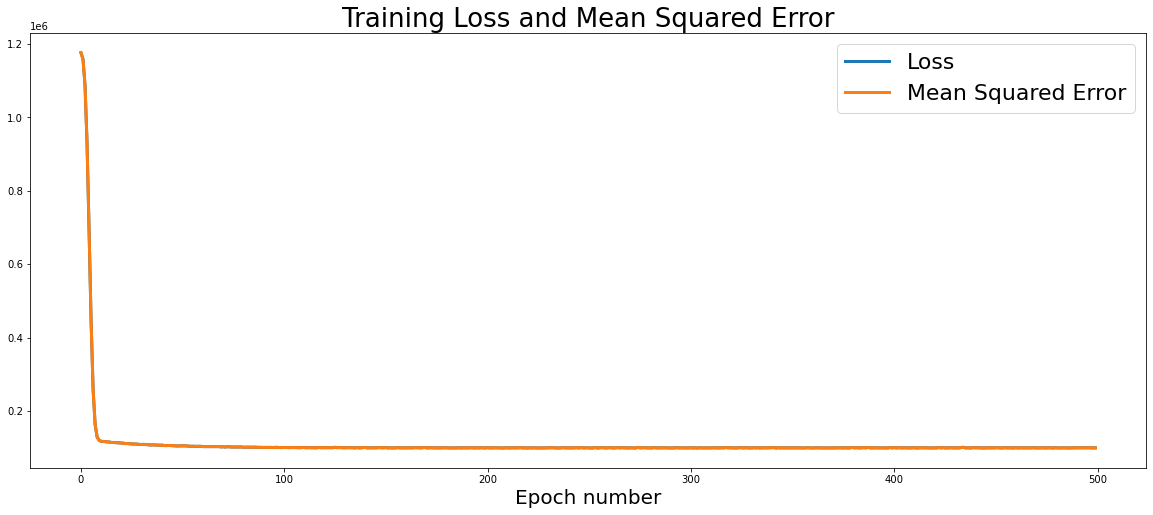

In [840]:
# generating a figure to analyse the DNN model training performance
plt.figure(figsize = (20, 8))

# plotting training loss and mean squared error versus epochs
plt.plot(model_training.history['loss'], linewidth = 3)
plt.plot(model_training.history['mean_squared_error'], linewidth = 3)

# naming and labeling the figure
plt.xlabel('Epoch number', fontsize = 20)
plt.title('Training Loss and Mean Squared Error', fontsize = 26)

# putting a legend into the figure
plt.legend(['Loss', 'Mean Squared Error'], fontsize = 22)

# saving the figure as a png file
plt.savefig("DNN training performance.png", dpi = 300)

In [842]:
# removing monthly total traded water volumes from the new dataset to have information only on average prices
price_data = quality_data.drop(['Total Traded Volume (ML)'], axis = 1)

# displaying the price-only dataset
price_data.head()

,Volume Weighted Price ($)
Date,
2009-05-01,1327.063808
2009-06-01,971.378826
2009-10-01,1391.250243
2010-01-01,1406.808987
2010-02-01,1473.109005


In [843]:
# dividing the price-only dataset into training and testing datasets
train_price_data, test_price_data = train_test_split(price_data, test_size = 0.2, shuffle = True)

# scaling price-only training and testing dataset
scaled_train_price_data = scaler.fit_transform(train_price_data)
scaled_test_price_data = scaler.transform(test_price_data)

In [844]:
# defining dimensions of time series data for training an LSTM neural network
n_input = 10
n_features = 1

# employing time series generator from keras to modify price-only training dataset as time series data
train_data_time_series = keras.preprocessing.sequence.TimeseriesGenerator(scaled_train_price_data, scaled_train_price_data, length = n_input, batch_size = 1)

In [853]:
# creating a model for a LSTM neural network
model2 = Sequential()

# adding an input layer into the model and adding two LSTM layers
model2.add(LSTM(100, return_sequences = True, activation = 'relu', input_shape = (n_input, n_features)))
model2.add(LSTM(64, return_sequences = False, activation = 'relu'))

# adding two dense layers
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(8, activation = 'relu'))

# adding an output layer into the model
model2.add(Dense(1, activation = 'linear'))

In [854]:
# displaying the LSTM model summary
model2.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 10, 100)           40800     
_________________________________________________________________
lstm_13 (LSTM)               (None, 64)                42240     
_________________________________________________________________
dense_46 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_47 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 9         
Total params: 87,729
Trainable params: 87,729
Non-trainable params: 0
_________________________________________________________________


In [855]:
# compiling the LSTM model 
model2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), 
              loss = tf.keras.losses.MeanSquaredError(), 
              metrics = tf.keras.metrics.MeanSquaredError())

In [856]:
# an initial selection of epochs and batch size
epochs = 300
batch_size = 32 

# training the model and recording its training history for further performance analysis
training = model2.fit(train_data_time_series, epochs = epochs, batch_size = batch_size, verbose = 0)

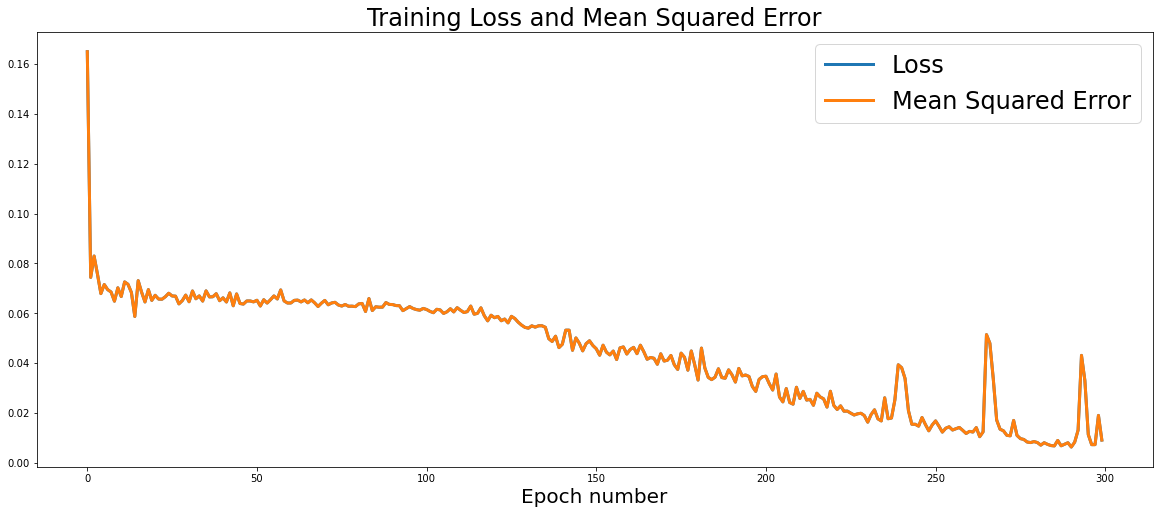

In [857]:
# generating a figure to analyse the LSTM model training performance
plt.figure(figsize = (20, 8))

# plotting training loss and mean squared error versus epochs
plt.plot(training.history['loss'], linewidth = 3)
plt.plot(training.history['mean_squared_error'], linewidth = 3)

# naming and labeling the figure
plt.xlabel('Epoch number', fontsize = 20)
plt.title('Training Loss and Mean Squared Error', fontsize = 24)

# putting a legend into the figure
plt.legend(['Loss', 'Mean Squared Error'], fontsize = 24)

# saving the figure as a png file
plt.savefig("LSTM training performance.png", dpi = 300)

In [861]:
# creating an empty list to collect predictions made by the trained LSTM model
test_predictions = []

# creating a first batch from the price-only training dataset as input for the LSTM model 
first_batch = scaled_train_price_data[-n_input:]

# reshaping the first batch as three-dimensional input for the LSTM model
current_batch = first_batch.reshape((1, n_input, 1))

# the following 'for' loop makes the first price prediction based on the last 10 (n_input = 10) values
# the price-only training dataset, appends the made prediction into a relevant list, replaces the last value 
# of the previously used batch with the predicted value, and continues the whole process
for i in range(len(scaled_test_price_data)):
    
    current_prediction = model2.predict(current_batch)[0]
    
    test_predictions.append(current_prediction)
    
    current_batch = np.append(current_batch[:, 1:, :], [[current_prediction]], axis = 1)

In [862]:
# inverse scaling the list of predicted monthly average water allocation values
predictions = scaler.inverse_transform(test_predictions)

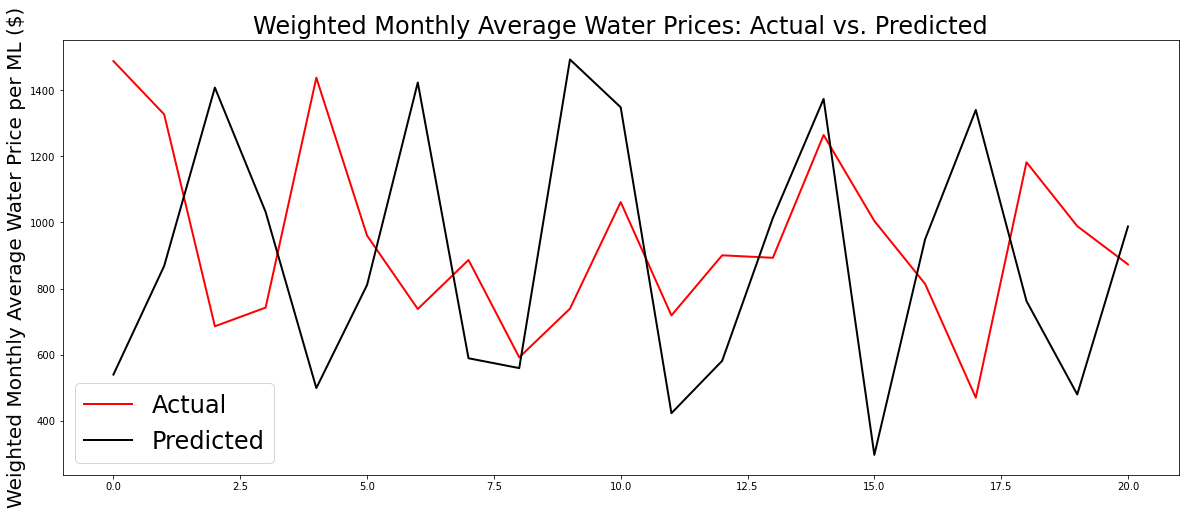

In [864]:
# creating a figure
plt.figure(figsize = (20, 8))

# plotting price-only testing data points
plt.plot(test_price_data.values, color = 'red', linewidth = 2, label = 'Actual')

# plotting predicted monthly average prices
plt.plot(predictions, color = 'black', linewidth = 2, label = 'Predicted')

# naming and labelling the figure
plt.title('Weighted Monthly Average Water Prices: Actual vs. Predicted', fontsize = 24)

plt.ylabel('Weighted Monthly Average Water Price per ML ($)', fontsize = 20)

# putting a legend into the figure
plt.legend(fontsize = 24)

# saving the figure as a png file
plt.savefig("LSTM model performance.png", dpi = 300)

In [900]:
# the following function aims at removing all NaN values from the imported csv files
def data_processing(dataset):
    
    # creating a list of all data features
    data_features = list(dataset.columns.values)
    
    # calculating the number of NaN values in each data column
    columns_nan_counts = dataset.isna().sum()
    
    # deciding on a threshold value
    threshold_nan_count = 0
    
    # the following 'for' loop aims at dropping all the columns from the data, which have NaN values
    for i in range(len(columns_nan_counts)):
        if columns_nan_counts[i] > threshold_nan_count:
            dataset = dataset.drop([data_features[i]], axis = 1)
    
    # modifying the setting of 'Time' column to datetime format
    dataset['Time'] = pd.to_datetime(dataset["Time"])

    # creating and adding two separate date-related columns into the data
    dataset["Year"] = dataset["Time"].dt.year
    dataset["Month"] = dataset["Time"].dt.month

    # dropping previous date column from the data
    dataset = dataset.drop('Time', axis = 1)
    
    # combining previously added date-related columns (year and month) into a single 'Date' column
    dataset['Date'] = pd.to_datetime(dataset['Year'].astype(str) + dataset['Month'].astype(str), format = '%Y%m')

    # removing previously added date-related columns (year and month) from the data
    dataset = dataset.drop(['Year'], axis = 1)
    dataset = dataset.drop(['Month'], axis = 1)
    
    # returning processed dataset
    return dataset

In [901]:
# importing monthly rainfall dataset to examine its effect on water price prediction 
rainfall_data = pd.read_csv('Downloads/LDI project data/MonthlyMeanRainfall.csv')

# displaying rainfall data
rainfall_data.head()

,Time,00001,00004,00008,00009,00014,00015,00018,00052,00072,...,sp-o10298,sp-o10350,sp-o10438,sp-o10606,sp-o10814,sp-o10926,sp-o10930,sp-o11430,sp-o11454,sp-o11590
0,2010-01-31 00:00:00+10:00,0.2,10.4,37.0,12.5,NaN,NaN,10.4,NaN,89.6,...,73.9,11.6,18.5,21.1,15.1,1.4,32.3,29.5,22.9,104.8
1,2010-02-28 00:00:00+10:00,22.7,191.4,183.0,159.0,NaN,NaN,209.3,NaN,NaN,...,124.6,58.2,54.3,29.7,107.6,19.4,57.8,27.8,29.5,142.4
2,2010-03-31 00:00:00+10:00,66.4,67.6,93.6,53.0,NaN,NaN,87.6,NaN,NaN,...,103.4,59.0,156.2,85.0,69.4,124.7,126.2,61.0,103.2,166.0
3,2010-04-30 00:00:00+10:00,159.4,11.6,121.0,5.0,NaN,NaN,51.5,NaN,NaN,...,67.2,73.8,53.0,30.2,40.3,25.7,102.9,37.5,43.0,131.0
4,2010-05-31 00:00:00+10:00,57.8,75.4,164.8,61.5,NaN,NaN,146.4,NaN,NaN,...,51.4,47.8,67.2,39.6,60.7,0.0,60.1,65.0,41.0,75.4


In [902]:
# processing rainfall data to remove all NaN values
rainfall_data = data_processing(rainfall_data)

# displaying rainfall data to display made changes
rainfall_data.head()

,00008,00009,00184,086131,215014,222004,224217,225201,225218,225224,...,sp-o10350,sp-o10438,sp-o10606,sp-o10814,sp-o10926,sp-o10930,sp-o11430,sp-o11454,sp-o11590,Date
0,37.0,12.5,43.4,0.0,133.0,32.5,26.4,25.0,31.2,34.0,...,11.6,18.5,21.1,15.1,1.4,32.3,29.5,22.9,104.8,2010-01-01
1,183.0,159.0,180.0,0.0,30.5,116.5,114.2,107.8,101.6,136.2,...,58.2,54.3,29.7,107.6,19.4,57.8,27.8,29.5,142.4,2010-02-01
2,93.6,53.0,106.0,0.0,19.5,41.0,60.8,42.8,47.2,50.6,...,59.0,156.2,85.0,69.4,124.7,126.2,61.0,103.2,166.0,2010-03-01
3,121.0,5.0,126.6,0.0,17.5,19.5,17.2,26.4,22.0,49.2,...,73.8,53.0,30.2,40.3,25.7,102.9,37.5,43.0,131.0,2010-04-01
4,164.8,61.5,90.5,0.0,63.0,69.0,45.2,41.2,66.0,53.2,...,47.8,67.2,39.6,60.7,0.0,60.1,65.0,41.0,75.4,2010-05-01


In [903]:
# sorting rainfall data based on the desired datetime range
desired_rainfall_data = rainfall_data[rainfall_data['Date'].between('2009-05-01', '2024-04-01')]

# setting 'Date' column of rainfall data as an index to properly merge it to the volume-price data
desired_rainfall_data.set_index('Date', inplace = True)

# joining processed rainfall data with the volume-price data
new_data = quality_data.join(desired_rainfall_data)

# removing all NaN values from the new data
new_data = new_data.dropna()

# displaying the new data
new_data.head()

,Total Traded Volume (ML),Volume Weighted Price ($),00008,00009,00184,086131,215014,222004,224217,225201,...,sp-o10138,sp-o10350,sp-o10438,sp-o10606,sp-o10814,sp-o10926,sp-o10930,sp-o11430,sp-o11454,sp-o11590
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,33958.7,1406.808987,37.0,12.5,43.4,0.0,133.0,32.5,26.4,25.0,...,12.1,11.6,18.5,21.1,15.1,1.4,32.3,29.5,22.9,104.8
2010-02-01,76864.5,1473.109005,183.0,159.0,180.0,0.0,30.5,116.5,114.2,107.8,...,39.7,58.2,54.3,29.7,107.6,19.4,57.8,27.8,29.5,142.4
2010-03-01,16788.1,1421.156657,93.6,53.0,106.0,0.0,19.5,41.0,60.8,42.8,...,80.2,59.0,156.2,85.0,69.4,124.7,126.2,61.0,103.2,166.0
2010-04-01,11819.6,1361.597181,121.0,5.0,126.6,0.0,17.5,19.5,17.2,26.4,...,43.7,73.8,53.0,30.2,40.3,25.7,102.9,37.5,43.0,131.0
2010-05-01,8390.7,1009.456071,164.8,61.5,90.5,0.0,63.0,69.0,45.2,41.2,...,35.5,47.8,67.2,39.6,60.7,0.0,60.1,65.0,41.0,75.4


In [879]:
# dividing the new merged dataset into price-only dataset and another dataset with all the remaining data features
X = new_data.drop(['Volume Weighted Price ($)'], axis = 1)
y = new_data['Volume Weighted Price ($)']

# dividing obtained sub-datasets into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, shuffle = True)

# scaling the volume-only training and testing datasets
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

# trainig a linear regression model on the training dataset and evaluating the model performance on the testing dataset
linear_regr.fit(scaled_X_train, y_train)
linear_regr.score(scaled_X_test, y_test)

-8.729495534647594

In [904]:
# importing water course discharge dataset to examine its effect on water price prediction 
discharge_data = pd.read_csv('Downloads/LDI project data/MonthlyMeanWaterCourseDischarge.csv')

# displaying water course discharge data
discharge_data.head()

,Time,212040,212060,2122518,2122711,2122713,2122725,215002,215007,215008,...,RE690,RE852,WT650,sp-o10109,sp-o10138,sp-o10350,sp-o10438,sp-o10606,sp-o11454,sp-o11590
0,2010-01-31 00:00:00+10:00,0.010,NaN,NaN,0.677,NaN,NaN,0.021,0.064,0.052,...,0.0,0.105,0.006,8.164,-0.132,0.014,33.720,0.368,-0.107,0.831
1,2010-02-28 00:00:00+10:00,0.085,NaN,NaN,5.301,NaN,NaN,11.149,1.600,3.037,...,0.0,0.108,0.006,1.684,-0.016,0.045,33.850,0.340,-0.075,0.773
2,2010-03-31 00:00:00+10:00,0.026,NaN,NaN,0.080,NaN,NaN,3.277,0.523,1.483,...,0.0,0.010,0.003,4.087,0.417,0.211,47.606,0.310,0.129,2.044
3,2010-04-30 00:00:00+10:00,0.024,NaN,NaN,0.028,NaN,NaN,0.607,0.176,0.366,...,0.0,0.180,0.002,5.001,-0.003,0.118,35.217,0.617,0.094,3.021
4,2010-05-31 00:00:00+10:00,6.494,NaN,NaN,0.104,NaN,NaN,2.311,0.610,0.956,...,0.0,0.299,0.008,4.276,0.053,0.116,19.229,0.155,0.103,3.119


In [905]:
# processing water course discharge data to remove all NaN values
discharge_data = data_processing(discharge_data)

# displaying water course discharge data to display made changes
discharge_data.head()

,2122711,215002,215007,215014,215208,215239,217006,218001,218005,218007,...,414201,414203,415201,415203,415214,415246,sp-o10109,sp-o11454,sp-o11590,Date
0,0.677,0.021,0.064,0.000,0.017,0.018,0.000,0.002,0.045,0.009,...,105.230,94.647,0.000,0.820,0.002,0.006,8.164,-0.107,0.831,2010-01-01
1,5.301,11.149,1.600,1.851,12.761,0.198,0.457,2.742,45.160,8.282,...,74.225,68.870,0.008,1.414,0.002,0.002,1.684,-0.075,0.773,2010-02-01
2,0.080,3.277,0.523,0.009,3.587,0.035,0.039,0.646,6.926,2.100,...,70.484,66.915,0.000,0.000,0.002,0.002,4.087,0.129,2.044,2010-03-01
3,0.028,0.607,0.176,0.007,1.150,0.042,0.023,0.138,1.325,0.248,...,39.586,40.348,0.112,0.000,0.002,0.002,5.001,0.094,3.021,2010-04-01
4,0.104,2.311,0.610,0.011,4.758,0.042,0.187,3.328,33.156,5.522,...,37.767,35.679,0.004,0.000,0.002,0.002,4.276,0.103,3.119,2010-05-01


In [906]:
# sorting water course discharge data based on the desired datetime range
desired_discharge_data = discharge_data[discharge_data['Date'].between('2009-05-01', '2024-04-01')]

# setting 'Date' column of water course discharge data as an index to properly merge it to the volume-price data
desired_discharge_data.set_index('Date', inplace = True)

# joining processed water course discharge data with the volume-price data
new_data = quality_data.join(desired_discharge_data)

# removing all NaN values from the new data
new_data = new_data.dropna()

# displaying the new data
new_data.head()

,Total Traded Volume (ML),Volume Weighted Price ($),2122711,215002,215007,215014,215208,215239,217006,218001,...,412124,414201,414203,415201,415203,415214,415246,sp-o10109,sp-o11454,sp-o11590
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,33958.7,1406.808987,0.677,0.021,0.064,0.000,0.017,0.018,0.000,0.002,...,0.000,105.230,94.647,0.000,0.820,0.002,0.006,8.164,-0.107,0.831
2010-02-01,76864.5,1473.109005,5.301,11.149,1.600,1.851,12.761,0.198,0.457,2.742,...,0.000,74.225,68.870,0.008,1.414,0.002,0.002,1.684,-0.075,0.773
2010-03-01,16788.1,1421.156657,0.080,3.277,0.523,0.009,3.587,0.035,0.039,0.646,...,0.002,70.484,66.915,0.000,0.000,0.002,0.002,4.087,0.129,2.044
2010-04-01,11819.6,1361.597181,0.028,0.607,0.176,0.007,1.150,0.042,0.023,0.138,...,0.000,39.586,40.348,0.112,0.000,0.002,0.002,5.001,0.094,3.021
2010-05-01,8390.7,1009.456071,0.104,2.311,0.610,0.011,4.758,0.042,0.187,3.328,...,0.000,37.767,35.679,0.004,0.000,0.002,0.002,4.276,0.103,3.119


In [907]:
# dividing the new merged dataset into price-only dataset and another dataset with all the remaining data features
X = new_data.drop(['Volume Weighted Price ($)'], axis = 1)
y = new_data['Volume Weighted Price ($)']

# dividing obtained sub-datasets into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle = True)

# scaling the volume-only training and testing datasets
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

# trainig a linear regression model on the training dataset and evaluating the model performance on the testing dataset
linear_regr.fit(scaled_X_train, y_train)
linear_regr.score(scaled_X_test, y_test)

-20.773077889870084

In [908]:
# importing mean temperature dataset to examine its effect on water price prediction 
temperature_data = pd.read_csv('Downloads/LDI project data/MonthlyMeanTempData.csv')

# displaying mean temperature data
temperature_data.head()

,Time,2122518,2122711,2122713,2122725,215208,215209,215210,215237,215237B,...,GW087289.2.2,GW087320.1.1,GW087320.2.2,GW087335.1.1,GW087335.2.2,GW087337.1.1,GW087337.2.2,GW087340.1.1,GW087340.2.2,GW088184.1.1
0,2010-01-31 00:00:00+10:00,NaN,23.31,NaN,22.52,NaN,23.99,22.32,22.13,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-02-28 00:00:00+10:00,NaN,22.26,NaN,22.59,NaN,21.53,19.25,19.52,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-03-31 00:00:00+10:00,NaN,20.18,NaN,20.68,NaN,19.94,18.85,16.81,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-04-30 00:00:00+10:00,NaN,16.57,NaN,17.40,NaN,17.10,17.38,13.68,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-05-31 00:00:00+10:00,NaN,10.78,NaN,12.37,12.29,11.38,NaN,9.06,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [909]:
# processing mean temperature data to remove all NaN values
temperature_data = data_processing(temperature_data)

# displaying mean temperature data to display made changes
temperature_data.head()

,219025,225232,226227,235211,409002,409003,409014,409023,409025,409035,409036,409047,409061,410148,Date
0,20.9,22.3,22.8,16.8,25.1,25.5,25.7,26.3,24.0,25.3,13.9,25.7,26.7,-9.0,2010-01-01
1,21.5,22.3,23.5,18.0,25.8,26.0,26.2,26.9,25.2,25.9,13.9,26.1,26.9,12.5,2010-02-01
2,20.4,19.6,20.3,16.0,22.7,22.6,22.3,23.4,22.3,21.9,14.0,22.5,22.9,20.6,2010-03-01
3,17.5,17.4,17.4,14.5,19.1,19.1,18.8,20.1,19.2,18.4,14.0,19.0,19.2,16.9,2010-04-01
4,12.7,12.8,12.5,11.3,13.1,13.6,13.7,14.8,14.2,13.3,14.0,13.2,13.6,11.8,2010-05-01


In [910]:
# sorting mean temperature data based on the desired datetime range
desired_temperature_data = temperature_data[temperature_data['Date'].between('2009-05-01', '2024-04-01')]

# setting 'Date' column of mean temperature data as an index to properly merge it to the volume-price data
desired_temperature_data.set_index('Date', inplace = True)

# joining processed mean temperature data with the volume-price data
new_data = quality_data.join(desired_temperature_data)

# removing all NaN values from the new data
new_data = new_data.dropna()

# displaying the new data
new_data.head()

,Total Traded Volume (ML),Volume Weighted Price ($),219025,225232,226227,235211,409002,409003,409014,409023,409025,409035,409036,409047,409061,410148
Date,,,,,,,,,,,,,,,,
2010-01-01,33958.7,1406.808987,20.9,22.3,22.8,16.8,25.1,25.5,25.7,26.3,24.0,25.3,13.9,25.7,26.7,-9.0
2010-02-01,76864.5,1473.109005,21.5,22.3,23.5,18.0,25.8,26.0,26.2,26.9,25.2,25.9,13.9,26.1,26.9,12.5
2010-03-01,16788.1,1421.156657,20.4,19.6,20.3,16.0,22.7,22.6,22.3,23.4,22.3,21.9,14.0,22.5,22.9,20.6
2010-04-01,11819.6,1361.597181,17.5,17.4,17.4,14.5,19.1,19.1,18.8,20.1,19.2,18.4,14.0,19.0,19.2,16.9
2010-05-01,8390.7,1009.456071,12.7,12.8,12.5,11.3,13.1,13.6,13.7,14.8,14.2,13.3,14.0,13.2,13.6,11.8


In [916]:
# dividing the new merged dataset into price-only dataset and another dataset with all the remaining data features
X = new_data.drop(['Volume Weighted Price ($)'], axis = 1)
y = new_data['Volume Weighted Price ($)']

# dividing obtained sub-datasets into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle = True)

# scaling the volume-only training and testing datasets
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

# trainig a linear regression model on the training dataset and evaluating the model performance on the testing dataset
linear_regr.fit(scaled_X_train, y_train)
linear_regr.score(scaled_X_test, y_test)

0.37415541408436703

In [917]:
# creating a model for a deep neural network
model = Sequential()

# adding an input layer and three dense hidden layers into the network
model.add(Dense(100, activation = 'relu', input_shape = (scaled_X_train.shape[1],)))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))

# adding an output layer into the network
model.add(Dense(1, activation = 'linear'))

In [918]:
# compling the model
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), 
              loss = tf.keras.losses.MeanSquaredError(), 
              metrics = tf.keras.metrics.MeanSquaredError())

In [919]:
# an initial selection of the number of epochs and batch size
epochs = 500
batch_size = 1

# training the DNN model and recording its history for future performance analysis
model_training = model.fit(scaled_X_train, y_train, epochs = epochs, batch_size = batch_size, verbose = 0)

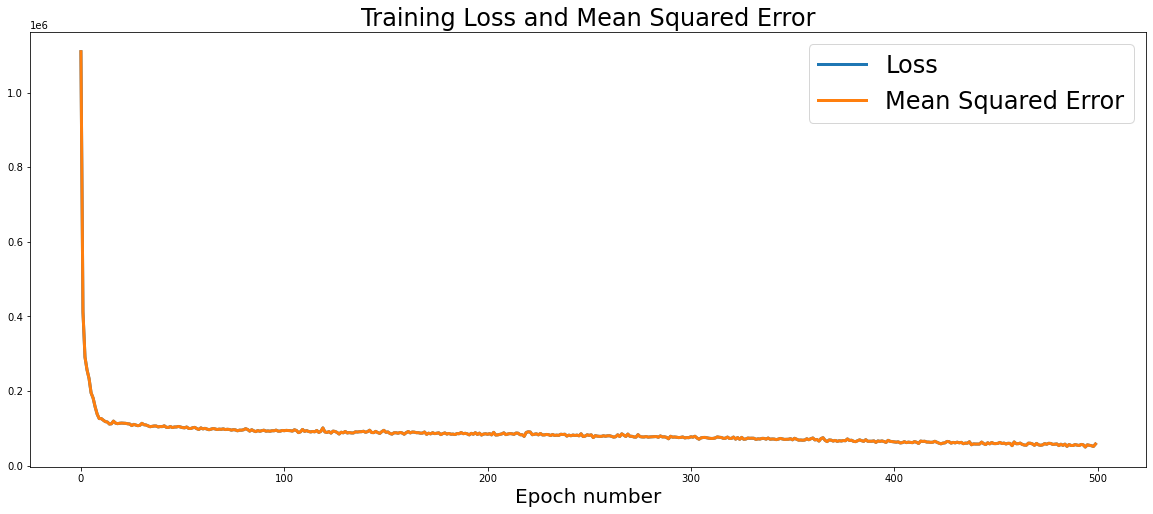

In [920]:
# creating a figure
plt.figure(figsize = (20, 8))

# plotting both training loss and mean squared error versus training epochs
plt.plot(model_training.history['loss'], linewidth = 3)
plt.plot(model_training.history['mean_squared_error'], linewidth = 3)

# naming and labelling the figure
plt.xlabel('Epoch number', fontsize = 20)
plt.title('Training Loss and Mean Squared Error', fontsize = 24)

# putting a legend into the figure
plt.legend(['Loss', 'Mean Squared Error'], fontsize = 24)